# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


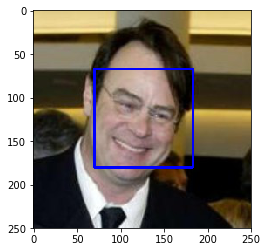

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__<br>
% Human Faces Detected in Human Files: 98.0%<br>% Human Faces Detected in Dog Files: 17.0%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_detected_counter = 0
for image_path in human_files_short:
    if (face_detector(image_path)):
        human_detected_counter += 1

print('% Human Faces Detected in Human Files: {}%'.format(str(human_detected_counter / len(human_files_short) * 100)))

human_detected_counter = 0
for image_path in dog_files_short:
    if (face_detector(image_path)):
        human_detected_counter += 1
        
print('% Human Faces Detected in Dog Files: {}%'.format(str(human_detected_counter / len(dog_files_short) * 100)))

% Human Faces Detected in Human Files: 98.0%
% Human Faces Detected in Dog Files: 17.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

# For the first pass of this project I will be utilizing the haarcascade_frontalface_alt.xml classifier since it
# achieves a 98% accuracy on the human faces dataset. This should be sufficient for now.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    print('Sending to CUDA')
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 96933480.75it/s] 


Sending to CUDA


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    
    # Self: Ensure image is loaded as tensor with appropriate size/transforms
    # Self: VGG-16 takes in and was trained on 224x224 images
    
    # Note: First attempt at preprocessing transforms. Only achieved 75% accuracy on dog detection
    #preprocess_transforms = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      #transforms.ToTensor()])
    
    # Note: 
    #         Dug into Pytorch examples for standard preprocessing. All pre-trained models use these transforms.
    #         Upgrading to these preprocessing transforms achieved 100% accuracy on dog dataset.
    # Source: https://github.com/pytorch/examples/blob/master/imagenet/main.py#L159-L165
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    preprocess_transforms2 = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     normalize])
    
    image = Image.open(img_path)
    #img_tensor = preprocess_transforms(image)
    img_tensor = preprocess_transforms2(image)
    img_tensor.unsqueeze_(0)
    
    # Self: Infer with VGG16
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    output = VGG16(img_tensor)
        
    
    # Self: Grab the index of the max percentage from the result
    _, pred_class_index = torch.max(output, 1)
    pred_class_index = pred_class_index.data.cpu().numpy()[0]
    
    #print('Index Found: {}'.format(str(pred_class_index)))
    
    ## Return the *index* of the predicted class for that image
    
    return pred_class_index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [6]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predicted_index = VGG16_predict(img_path)

    return predicted_index >= 151 and predicted_index <= 268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ <br>
% Dogs Detected in Human Files: 0.0% <br>
% Dogs Detected in Dog Files: 100.0%


In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_detected_counter = 0
for image_path in human_files_short:
    if (dog_detector(image_path)):
        dog_detected_counter += 1

print('% Dogs Detected in Human Files: {}%'.format(str(dog_detected_counter / len(human_files_short) * 100)))

dog_detected_counter = 0
for image_path in dog_files_short:
    if (dog_detector(image_path)):
        dog_detected_counter += 1
        
print('% Dogs Detected in Dog Files: {}%'.format(str(dog_detected_counter / len(dog_files_short) * 100)))

% Dogs Detected in Human Files: 0.0%
% Dogs Detected in Dog Files: 100.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# For the first pass of this project, I will continue using the pre-trained VGG16. It's tested, trained, reliable
# and accurate for detecting dogs.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [7]:
import os
from torchvision import datasets

#Me: Added to resolve truncated image error enocuntered - truncated images will now be loaded
from PIL import ImageFile 
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_dir_path = "/data/dog_images/train"
valid_dir_path = "/data/dog_images/valid"
test_dir_path = "/data/dog_images/test"

# Note: Did not need to split the training set into train/validation sets. The folders are already set up that way.
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
train_transforms = transforms.Compose([
    #transforms.Resize(224),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    #transforms.Grayscale(),
    transforms.ToTensor(),
    normalize
])

test_transforms = transforms.Compose([#transforms.Resize(224), 
                                      transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      #transforms.Grayscale(),
                                      transforms.ToTensor(),
                                      normalize])

train_data = datasets.ImageFolder(train_dir_path, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir_path, transform=test_transforms)
validation_data = datasets.ImageFolder(valid_dir_path, transform=test_transforms)


# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size,
                                               num_workers=num_workers, shuffle=True)

loaders_scratch = {
    'train': train_loader,
    'test': test_loader,
    'valid': validation_loader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:<br>
How my code resizes, crops, and normalizes the input images similarly how VGG16 was trained but with additional augmentations:
        
         Size: I picked the same image size used for training/testing the VGG16 (224x224) for consistency between my CNN and VGG16 datasets, efficiency, and gives the CNN plenty of pixels to extract features from at each layer.
      
         Cropping/Stretching: Chose to augment the images in other ways in order to maintain the entirety of the image - the full context of the dog's features can be "seen" by the CNN.
         
         Normalization: I normalized the image's pixel values so that they were all weighed similarly by the CNN during training. Ensures that each breed is weighed equally in pixel values. Utilized the normalizaton means used for VGG16 training/testing.
    
        Flips/Rotations: I chose to do flips and random rotations in order for the CNN to be able to generalize better after training rather than overfit the training data.
        
        Shuffling of Data: I also ensured that the data loaders shuffle the data so that the order of the datasets doesn't lead to overfitting.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [8]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # Starting with a basic CNN Architecture - Input size 224x224x1(BW)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)     #224x224x3
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)    #112x112x16
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)    #56x56x32  - Might be able to just stop here
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)   #28x28x64
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)  #14x14x128 | Output Dim: 7x7x256
        
        # Pooling layer - used after each Convolutional Layer - Cuts img Dim by half
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully-Connected Classification Layer
        # Hidden Nodes Start = (7 * 7 * 256) + 133 classes / 2 = 12,544
        self.layer1 = nn.Linear(7 * 7 * 256, 12544, bias=True)
        #self.layer2 = nn.Linear(12544, 6272, bias=True)
        #self.layer3 = nn.Linear(6272, 3136, bias=True)
        self.outputLayer = nn.Linear(12544, 133)        
        
        # Dropout - Help NN train: Less overfit | more generalization | Model started overfitting after 24 epochs with 0.2
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        ## Define forward behavior
        #print(x.shape)
        
        # Conv. Layer Passthrough: Conv --> RELU Activation Fxn --> Maxpool for each layer
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        
        # Flatten into Feature Vector
        #print(x.shape)
        x = x.view(-1, 7 * 7 * 256)
        
        # Fully-Connected Layer Passthrough
        x = self.dropout(x)
        x = F.relu(self.layer1(x))
        #x = self.dropout(x)
        #x = F.relu(self.layer2(x))
        #x = self.dropout(x)
        #x = F.relu(self.layer3(x))
        
        # Output Layer
        x = self.dropout(x)
        x = self.outputLayer(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.

__Answer:__
        1. Started with a basic CNN Architecture similar to VGG16 - Input size 224x224x3 (color images). Attempted to start with greyscale images thinking it'd help ignore coloring and focus on shape features of the dogs but got poor training results.
        2. Extracted features from the image with 5 Convolutional layers. Took the initial depth of 3 and ended with a depth of 256. Reduced starting image dimension from 224x224 to 7x7. Effectively extracting semi-complex features from the images.
        3. Pooling layer - used after each Convolutional Layer - Cuts img Dim by half. Keep most active pixels.<br>        
        4. Fully-Connected Classification Layer: Started with 3 fully connected layers in the classifier but after slow training results I reduced to 2 (including hidden layer). 
        5. Started Number of Hidden Nodes with the average between final image dimensions and number of dog breed classes = (7 * 7 * 256) + 133 classes / 2 = 12,544      
        6. Dropout - Help NN train: Less overfit | more generalization | Model started overfitting after 24 epochs with 0.2
        7. Forward Pass: Conv Layers --> RELU Activation Fxns --> Maxpool for each layer
        8. Flatten into Feature Vector - Extracted features from Conv. layers for input into classifier
        9. Pass Feature vector through fully connected layers with RELU Activaton functions
        10. 50% Dropout added between fully connected layers to prevent overfitting while training for more epochs
        11. Receive Output

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
#criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)
#optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.inf
    
    # Added to start with the most recently saved parameters
    if (save_path != ''):
        print(save_path + ' params loaded!')
        model.load_state_dict(torch.load(save_path))
        
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## find the loss and update the model parameters accordingly
            
            # Clear gradients
            optimizer.zero_grad()
            
            # Forward Pass
            output = model(data)
            
            # Calc. Loss
            loss = criterion(output, target)
            #print(output)
            
            # Backprop Calculations
            loss.backward()
            
            # Update Model Parameters
            optimizer.step()
            
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # Forward pass
            output = model(data)
            # Loss
            loss = criterion(output, target)
            # Update Average Validation Loss
            #valid_loss += loss.item()*data.size(0) Note: Was not getting the values expected with this method. Went with suggestion above.
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if (valid_loss < valid_loss_min):
            print('New Min. Loss {:.6f} --> {:.6f} | Model Saved!'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model - Commented out after training and saving the model parameters
#model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
#                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [14]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.998679


Test Accuracy: 12% (108/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [15]:
## TODO: Specify data loaders
train_dir_path = "/data/dog_images/train"
valid_dir_path = "/data/dog_images/valid"
test_dir_path = "/data/dog_images/test"

batch_size = 30
num_workers = 0

# Normalize & Transform the image as expected by Pre-Trained VGG16
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     normalize])

train_transfer = datasets.ImageFolder(train_dir_path, transform=data_transform)
test_transfer = datasets.ImageFolder(test_dir_path, transform=data_transform)
valid_transfer = datasets.ImageFolder(valid_dir_path, transform=data_transform)

train_loader_transfer = torch.utils.data.DataLoader(train_transfer, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader_transfer = torch.utils.data.DataLoader(test_transfer, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader_transfer = torch.utils.data.DataLoader(valid_transfer, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
loaders_transfer = {
    'train': train_loader_transfer,
    'test': test_loader_transfer,
    'valid': valid_loader_transfer
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [16]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True) # Starting with Pre-trained VGG16 network

# Freeze the parameters of the pre-trained network
for param in model_transfer.features.parameters():
    param.require_grad = False


# Replace the final classification layer - 4096 Features In - 133 Classes Out
model_transfer.classifier[6] = torch.nn.Linear(4096, 133)

# Remove Dropout to speed up training
model_transfer.classifier = nn.Sequential(*[model_transfer.classifier[0],
                                                 model_transfer.classifier[1],
                                                 model_transfer.classifier[3],
                                                 model_transfer.classifier[4],
                                                 model_transfer.classifier[6]])
print(model_transfer)
    
if use_cuda:
    print('Model Transfer: Using CUDA')
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Selected the Pre-Trained VGG16 model architecture for the transfer learning model because:
- 1) It already detects 118 different types of dog breeds 
- 2) Proved itself accurate at detecting dogs in our dataset in section 'Write a Dog Detector'
- 3) The model is proven to generalize to various images with reasonable accuracy (26.63 Top-1 Error | 8.50 Top-5 Error)
- 4) Its ability to generalize and already detect different breeds provides a stong and simple foundation to start with.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [17]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [23]:
# train the model
# Note: May be worth creating basic loaders with minimal transforms
model_transfer = train(25, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [18]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.894074


Test Accuracy: 73% (616/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [19]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes] #Updated from data_transfer
#print(class_names)

def predict_breed_transfer(img_path):
    # Load the input image
    image = Image.open(img_path)
    
    # Transform the image to be used in the model_transfer model
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    img_transforms = transforms.Compose([
                        transforms.RandomResizedCrop(224),
                        #transforms.Resize(224),
                        transforms.ToTensor(),
                        normalize])
    
    img_tensor = img_transforms(image)
    img_tensor.unsqueeze_(0)
    
    if use_cuda:
        img_tensor = img_tensor.cuda()
        
    # Set Model to Eval mode (No gradient/Training)
    model_transfer.eval()
    
    # Get prediction
    output = model_transfer(img_tensor)
    
    _ , pred_index = torch.max(output, 1)
    pred_index = pred_index.data.cpu().numpy()[0] #Move data to CPU

    #print (str(pred_index) + '|' + class_names[pred_index])
    
    return pred_index

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [20]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    image = Image.open(img_path)
    #image.show()
    
    fig = plt.figure(figsize=(8, 5))
    
    plt.imshow(image)
    #img_numpy = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

    isHuman = face_detector(img_path)
    isDog = dog_detector(img_path)
    breed = class_names[predict_breed_transfer(img_path)]
    
    if (isHuman):
        plt.title("Hey Human! Lookin like a " + breed)
        #print("You're a human but look like a " + breed)
    
    elif (isDog):
        plt.title("Hey Dog! You're a " + breed)
        #print("Hey Dog! You're a " + breed)
    
    else:
        plt.title("I did not detect a human nor a dog...")
        #print("I did not detect a human nor a dog...")
        
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)<br>
The output is better than I was expecting on the data provided. However, the network still struggles to tell the differences between similar breeds.<br> For the computer images it isn't as accurate but is still interesting.<br>
For human images, it provides some funny responses. And sometimes does not detect a human when it should.<br><br>
Possible Points of Improvement:
1. Use a different pre-trained network like Inceptionv3 - reported to have lower Top-1 and Top-5 error
2. Add dropout back to the VGG16 classifier and retrain the network.
3. Add random data augmentation like 'Horizontal Flip' and 'Rotate' to the model_transfer dataloaders and retrain

4. Provide a user interface to input an image path.
5. Handle cases where an image and a dog are both detected in an image
6. Handle cases where there are multiple dogs and or humans in an image
7. Handle Mixed breeds
8. Improve human detection by exploring other face detectors in OpenCV

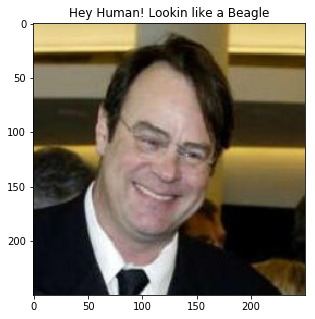

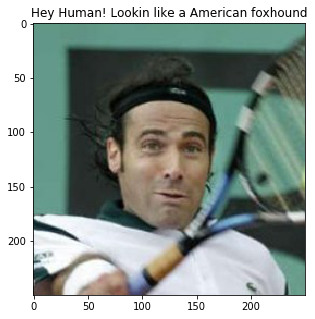

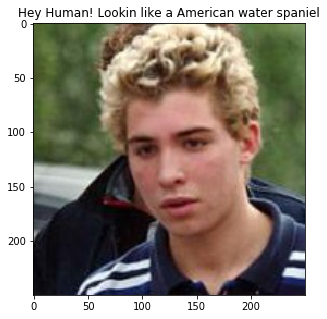

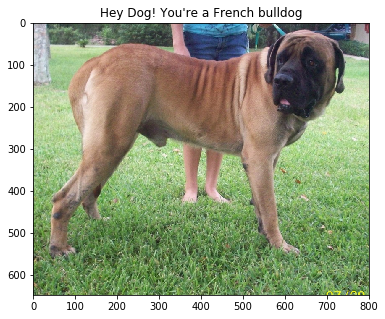

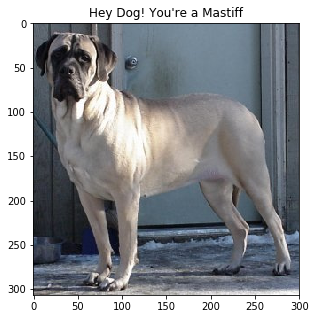

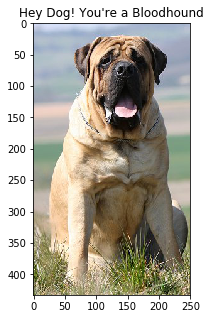

In [22]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

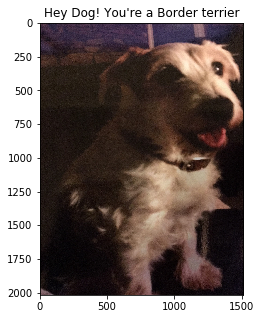

In [39]:
run_app("comp_images/dog_1.jpg")
#"images/Brittany_02625.jpg"

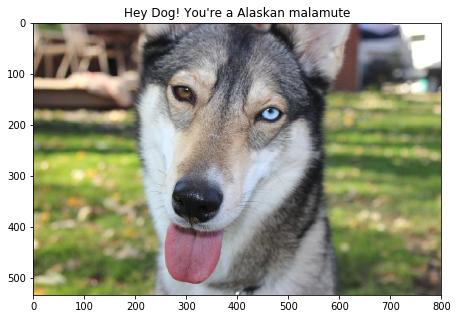

In [34]:
run_app("comp_images/dog_2.jpg")

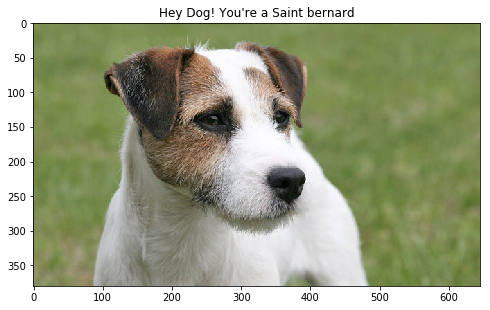

In [33]:
run_app("comp_images/dog_3.jpg")

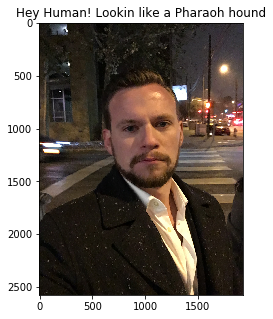

In [42]:
run_app("comp_images/human_1.jpg")

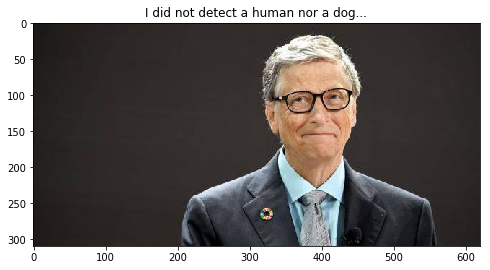

In [43]:
run_app("comp_images/human_2.jpg")

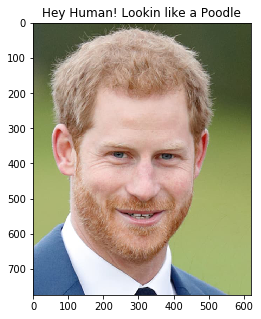

In [44]:
run_app("comp_images/human_3.jpg")